<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

# What to expect in this chapter

In the previous chapter, the tutorial demonstrated how Matplotlib can be utilized to generate straightforward yet visually appealing plots. However, only the surface of Matplotlib's extensive capabilities was scratched. To delve deeper, an alternative method of communicating with Matplotlib needs introduction. Up to this point, a 'dialect' known as the Matlab-like pyplot (plt) interface has been used. Moving forward, the tutorial will demonstrate the use of another, more robust 'dialect' called the Object-Oriented (OO) interface. Adopting this approach provides a more sophisticated control over the plotting process by enabling easy manipulation of various axes.

# 1 Some nomenclature

 An axis is the individual mathematical axes we use for plotting. So, one figure can have multiple axes, as shown below, where we have a (single) figure with four axes.



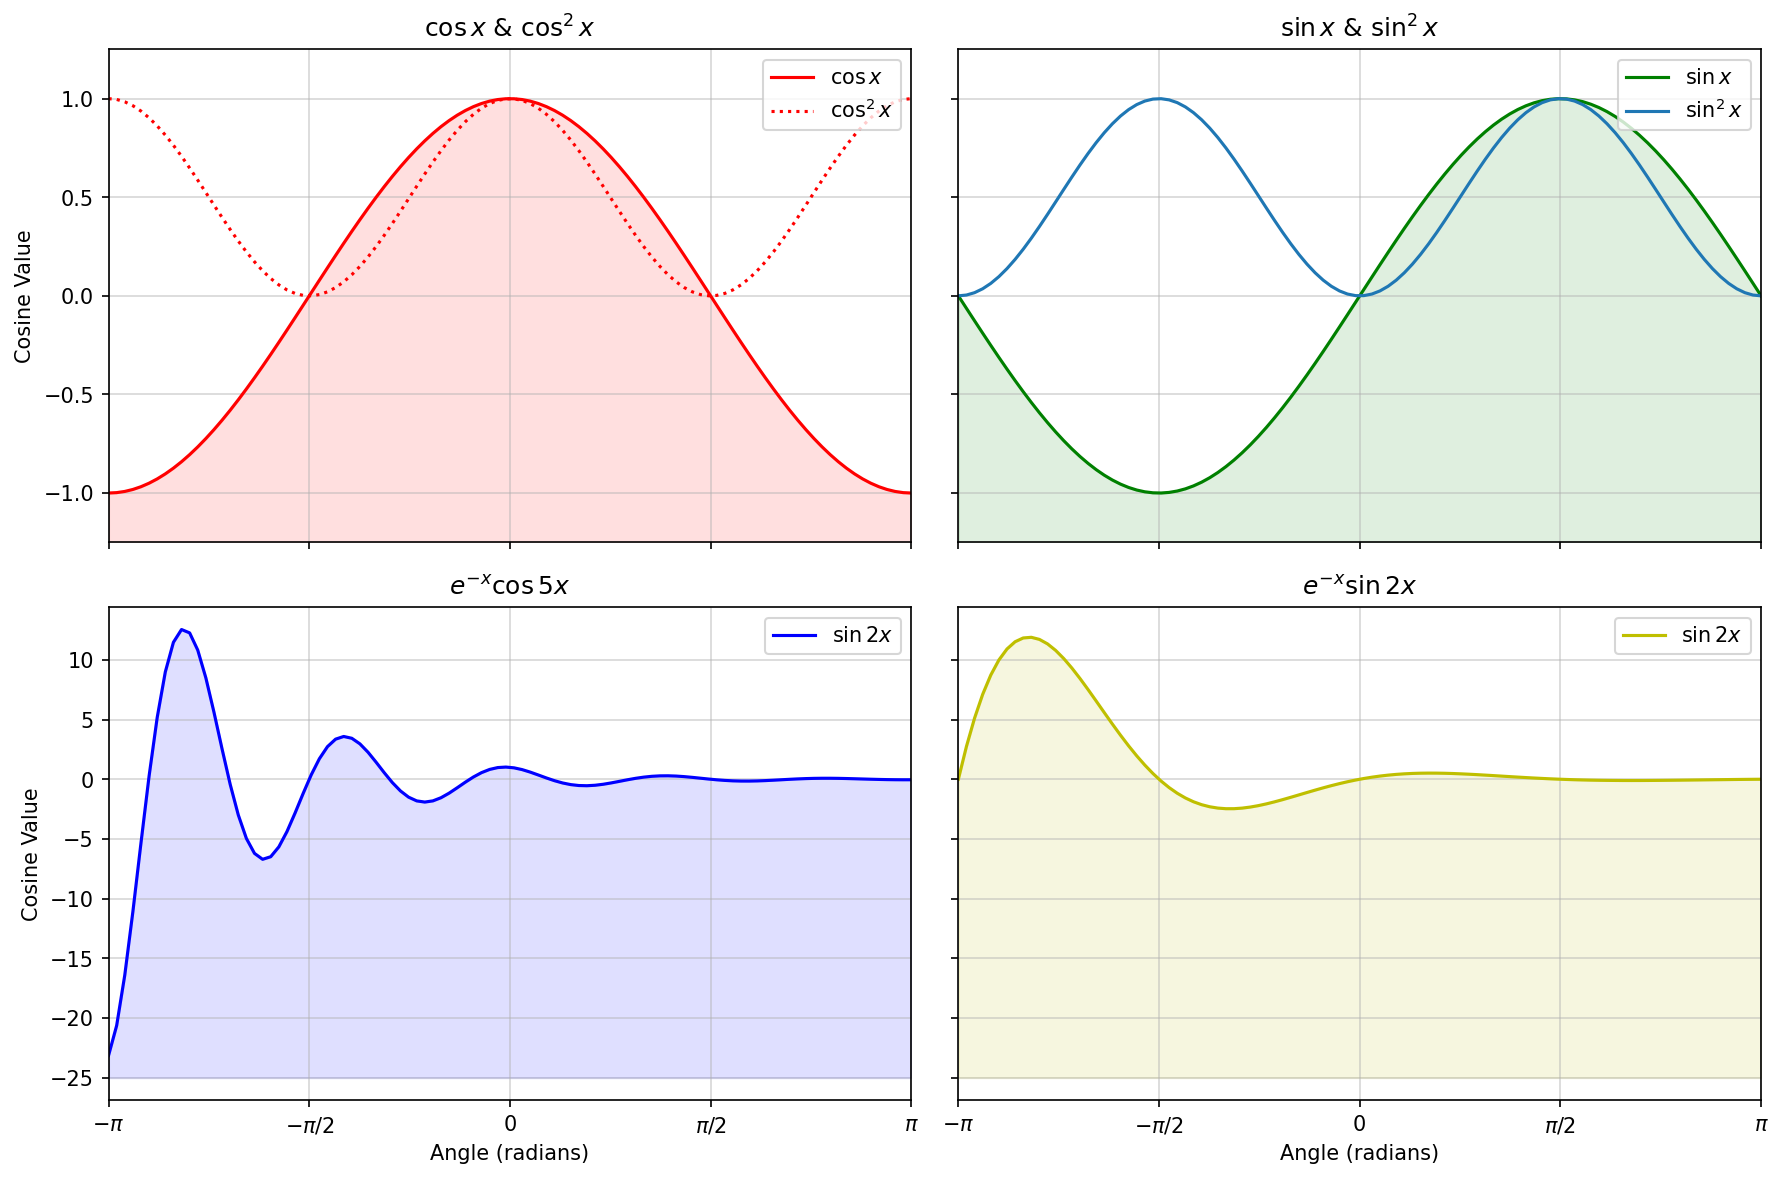

In [2]:
from IPython.display import Image

Image("https://sps.nus.edu.sg/sp2273/docs/python_basics/07_plotting/__imgs__/plotting_good_exercise-01_solution.png")


# 2 Comparing the two ‘dialects’

Create the same plot using both pyplot and OO ‘dialects’ 

In [4]:
import numpy as np

In [5]:
# generate data to plot 

x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

Now the comparison; remember that both sets of code will produce the same plot.

In [2]:
import matplotlib.pyplot as plt

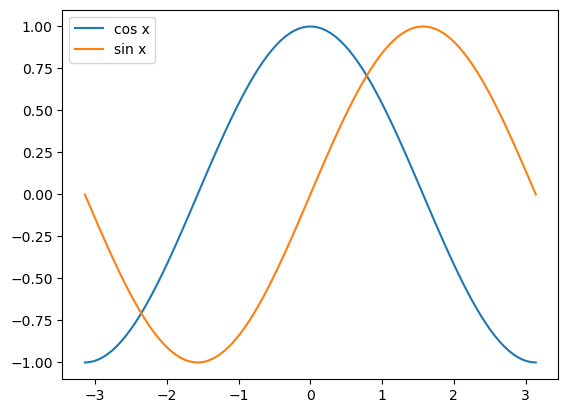

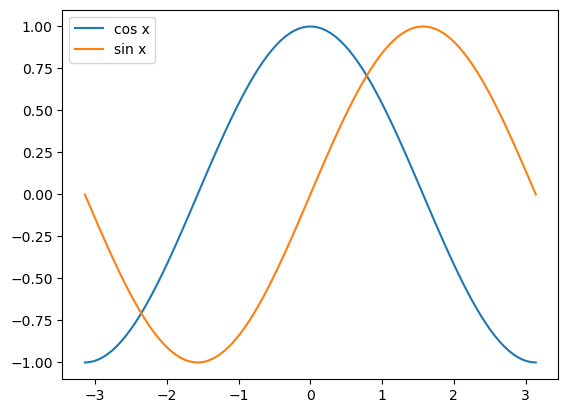

In [8]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()

### pyplot Interface

### OO Interface

For the OO interface, we have to start by using subplots() to ask Matplotlib to create a figure and an axis. Matplotlib obliges and gives us a figure (fig) and an axis (ax).

 the OO looks more comlicated than the pyplot version. But, it offers so much freedom that it is worth learning it for more demanding, complex plots. 
 
 Remember to use the pyplot interface for quick and dirty plots and the OO interface for more complex plots that demand control and finesse.

# 3 What is OO ax, really?

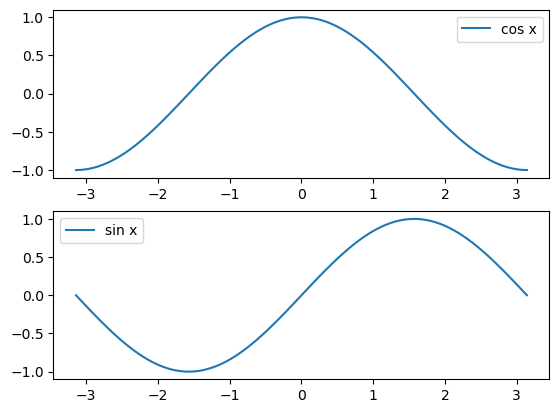

In [11]:
fig, ax = plt.subplots(nrows=2, ncols=1)  #to get 2 rows

ax[0].plot(x, cos_x, label='cos x')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [12]:
type(ax)  #it's a numpy array

numpy.ndarray

In [13]:
ax.shape  #it has 2 things

(2,)

In [14]:
type(ax[0]) #This is a Matplotlib axis.

matplotlib.axes._axes.Axes

# 4 A complete OO example

The following is a simple example that creates a nicer, tweaked version of the previous plot.

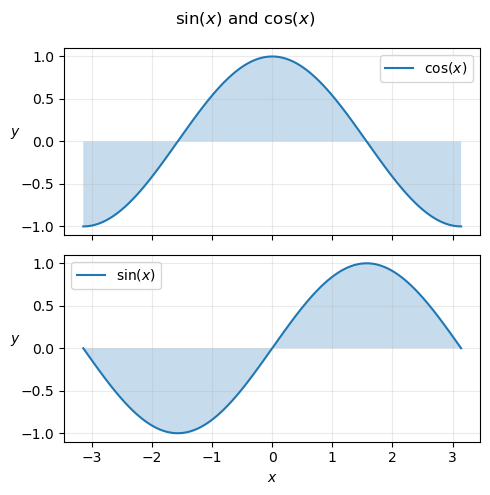

In [15]:
fig, ax = plt.subplots(nrows=2, ncols=1,          #Get two axes ready to plot in two rows in one column.
                       figsize=(5, 5),            #Change the size of the figure by specifying a figure size (figsize).
                       sharex=True)               #Ask that the plots share the x-axis using sharex.

ax[0].plot(x, cos_x, label=r'$\cos(x)$')          #Since ax is a NumPy array with two axes, we can index them using 0 and 1. 
                                                    #Then we just plot to that axis.
ax[0].fill_between(x, 0, cos_x, alpha=.25)        #Use fill_between() to fill the plots.
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax:                                      #for loop that iterates through the items in ax; no need to plot one by one
    a.legend()                                    #Draw the legends
    a.grid(alpha=.25)                             #Add a grid to each plot
    a.set_ylabel('$y$', rotation=0)               #Set the label

ax[1].set_xlabel('$x$')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')          #add a super title to the figure (notplot).
fig.tight_layout()                                #ask Matplotlib to make any necessary adjustments to the layout to 
                                                    #make our plot look nice by calling tight_layout(). 

# 5 Multiple rows and columns

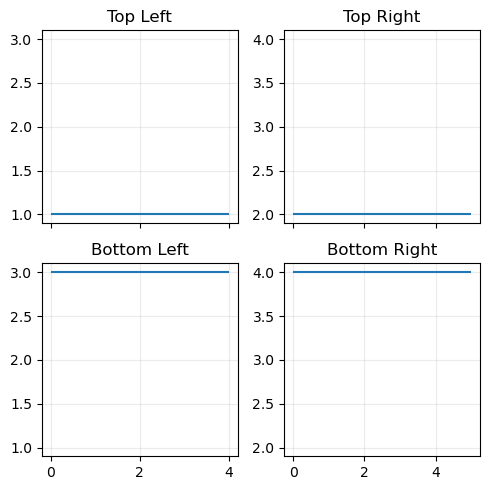

In [16]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='col')

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

### Using ax

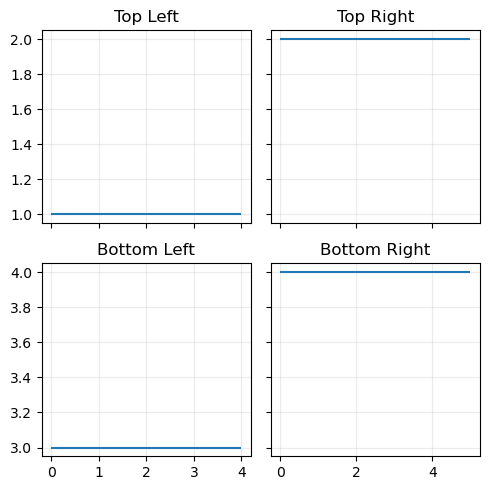

In [3]:
#create a figure and axes using:

fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex='col', sharey='row')
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()


We know there must be four axes; but how is ax structured?

In [18]:
ax.shape   #ax is organised as you see in the figure, as a 2 x 2 array.

(2, 2)

In [19]:
#can access each of the axes as follows:

ax[0, 0].set_title('Top Left')
ax[0, 1].set_title('Top Right')
ax[1, 0].set_title('Bottom Left')
ax[1, 1].set_title('Bottom Right')

Text(0.5, 1.0, 'Bottom Right')

This is a perfectly valid way to use ax. However, when you have to tweak each axis separately, it's easier to use a familiar variable by:

In [20]:
top_left=ax[0, 0]
top_right=ax[0, 1]
bottom_left=ax[1, 0]
bottom_right=ax[1, 1]

In [22]:
#or like this

top_left, top_right, bottom_left, bottom_right = ax.flatten()

#flatten() takes the 2D array and ‘flattens’(dah) it into a 1D array; unpacking takes care of the assignments.

In [23]:
#To draw lines: 

top_left.hlines(y=1, xmin=0, xmax=5)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=5)
bottom_right.hlines(y=4, xmin=0, xmax=5)

## 5.1 Sharing axes

Notice Matplotlib makes the plots more compact by sharing the X and Y axes using sharex and sharey.

If it's not specified how to share:

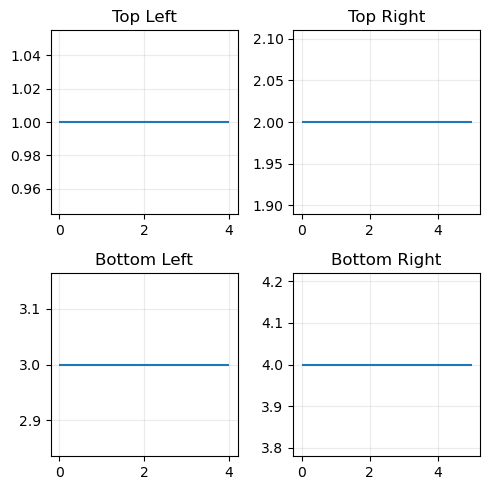

In [4]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5)
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

Matplotlib has auto-scaled both axes. In particular, the plots on the left go from 0 to 4, and those on the right go from 0 to 5, as these are the lengths I used for the lines.

|Option|Result                                      |
|:--|--:|
|True|Makes all the axes use the same range.|
|col|Use the same range for all the columns|
|row|Use the same range for all the rows|

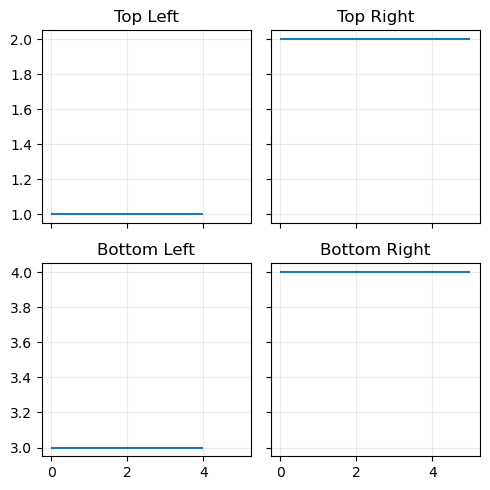

In [5]:
fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex=True, sharey='row'       #same range for the x-axis.
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

all the plots have the same range for the x-axis.

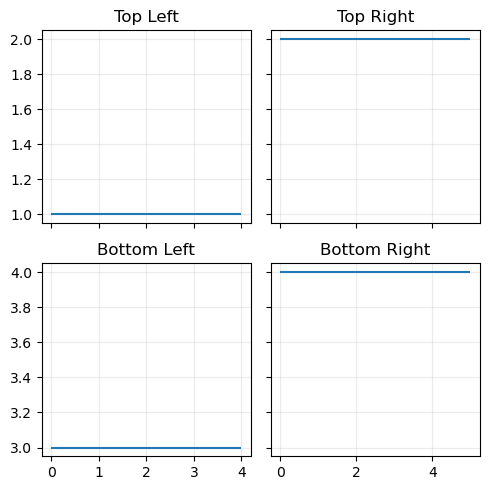

In [8]:
#However, sharex='col' is more suited for the data here

fig, ax = plt.subplots(
    nrows=2, ncols=2,
    figsize=(5, 5),
    sharex='col', sharey='row'
)

top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)

plt.tight_layout()

## 5.2 Accessing all axes

In [9]:
#To apply changes to all the axes, like in the case of the grid: 

top_left.grid(alpha=.25)
top_right.grid(alpha=.25)
bottom_left.grid(alpha=.25)
bottom_right.grid(alpha=.25)

In [10]:
#But this is inefficient and requires a lot of work. It is much nicer to use a for loop.

for a in ax.flatten():
    a.grid(alpha=.25)

# 6 Other useful plots

## 6.1 Histograms

A histogram is a valuable tool for showing distributions of data.

### Data

In [20]:
import os
import pandas as pd

# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# List files in the current directory
files_in_directory = os.listdir(current_directory)
print("Files in Directory:", files_in_directory)

# Specify the filename
file_name = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'

# Check if the file exists in the current directory
if file_name in files_in_directory:
    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_name)
    
    # Display the first few rows of the DataFrame to check if the data is loaded correctly
    data.head()
else:
    print(f"File '{file_name}' not found in the current directory. Please check the file path.")


Current Directory: C:\Users\B R Y A N\OneDrive\Desktop\learning-portfolio-bryanlimwayhern\plotting
Files in Directory: ['.ipynb_checkpoints', 'Complete_TAVG_daily.txt', 'plotting_(good).ipynb', 'plotting_(need).ipynb', 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv', 'simple-plot.png']


In [24]:
# Get the current working directory
current_directory = os.getcwd()
print("Current Directory:", current_directory)

# List files in the current directory
files_in_directory = os.listdir(current_directory)
print("Files in Directory:", files_in_directory)

# Specify the filename
file_name = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'

# Check if the file exists in the current directory
if file_name in files_in_directory:
    # Load the CSV file into a DataFrame
    data = pd.read_csv(file_name)
    
    # Display the first few rows of the DataFrame to check if the data is loaded correctly
    data.head()
else:
    print(f"File '{file_name}' not found in the current directory. Please check the file path.")


Current Directory: C:\Users\B R Y A N\OneDrive\Desktop\learning-portfolio-bryanlimwayhern\plotting
Files in Directory: ['.ipynb_checkpoints', 'Complete_TAVG_daily.txt', 'plotting_(good).ipynb', 'plotting_(need).ipynb', 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv', 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv', 'simple-plot.png']


### A quick helper function

 To read the data from these files several times, create a function called det_plot_data() that can be called. 

In [25]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data


### The histogram

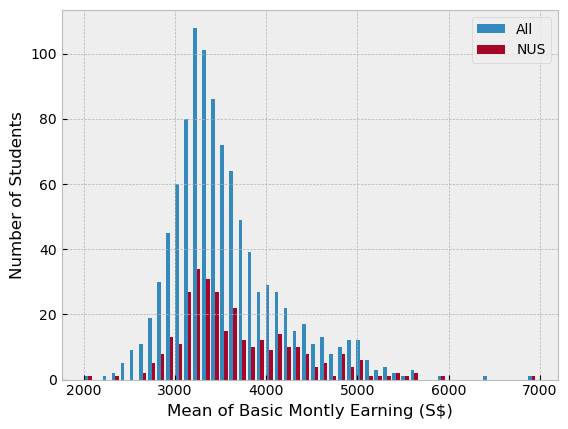

In [26]:
import numpy as np
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()


## 6.2 Scatter plots

Scatter plots are created by putting a marker at an (x,y) point you specify. They are simple yet powerful.

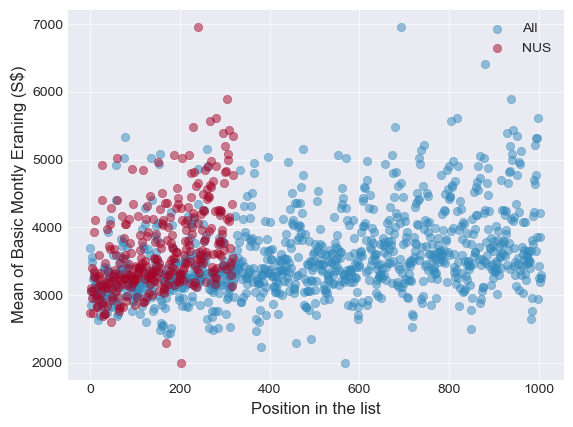

In [27]:
#data is the same but range() along with len() are used to generate a list [0,1,2...] appropriate to the dataset.

plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for label, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=label, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## 6.3 Bar charts

The data and typecast are extracted to pass two lists to bar(). Use barh() for horizontal bars.

Text(0, 0.5, 'Number of Students')

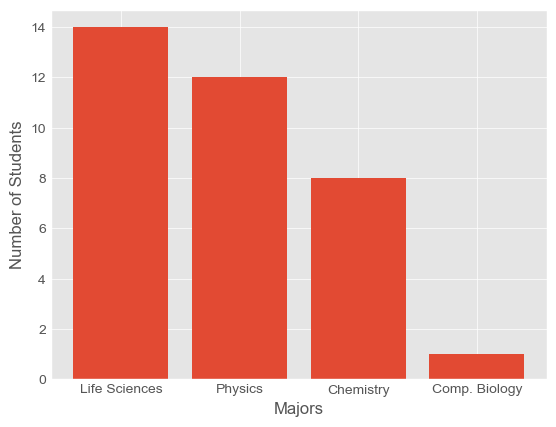

In [28]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers)
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## 6.4 Pie charts

Text(0.5, 1.0, 'Percentage of each major')

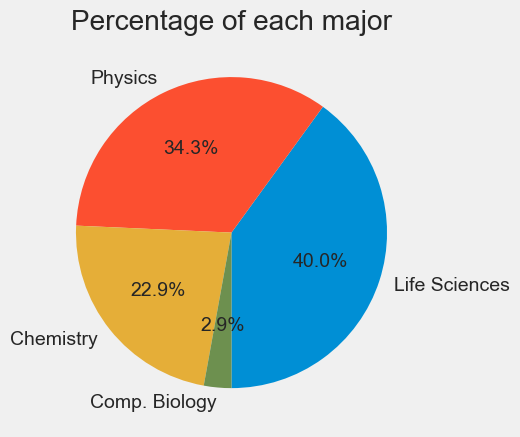

In [29]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')